In [2]:
import numpy as np
import matplotlib.pyplot as plt
import uav_packet as uavp
import uav_signal as uavs

UAV ID:  20
CONTROL ID:  2
UAV RECIEVER STATUS:  1
UAV TRANSMITTER STATUS:  1
CONTROL RECIEVER STATUS:  1
CONTROL TRANSMITTER STATUS:  1
CHANGE X:  5
CHANGE Y:  5
CHANGE Z:  -5
CHANGE PITCH:  -12
CHANGE ROLL:  0
CHANGE YAW:  -1
UAV ID:  20
CONTROL ID:  2
UAV RECIEVER STATUS:  1
UAV TRANSMITTER STATUS:  1
CONTROL RECIEVER STATUS:  1
CONTROL TRANSMITTER STATUS:  1
CHANGE X:  5
CHANGE Y:  5
CHANGE Z:  -5
CHANGE PITCH:  -12
CHANGE ROLL:  0
CHANGE YAW:  -1
UAV ID:  10
CONTROL ID:  2
UAV RECIEVER STATUS:  3
UAV TRANSMITTER STATUS:  5
CONTROL RECIEVER STATUS:  6
CONTROL TRANSMITTER STATUS:  1
CHANGE X:  -2
CHANGE Y:  -2
CHANGE Z:  0
CHANGE PITCH:  1
CHANGE ROLL:  0
CHANGE YAW:  0
TEXT:  In ECEN 526, we learn about Wi-Fi and its tricks, Hoping to make connections as smooth as butter sticks.
UAV ID:  10
CONTROL ID:  2
UAV RECIEVER STATUS:  3
UAV TRANSMITTER STATUS:  5
CONTROL RECIEVER STATUS:  6
CONTROL TRANSMITTER STATUS:  1
CHANGE X:  -2
CHANGE Y:  -2
CHANGE Z:  0
CHANGE PITCH:  1
CHANGE ROLL

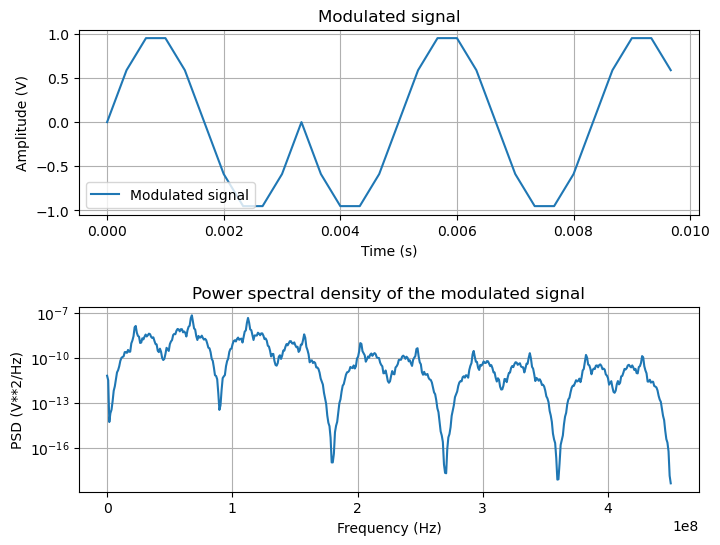

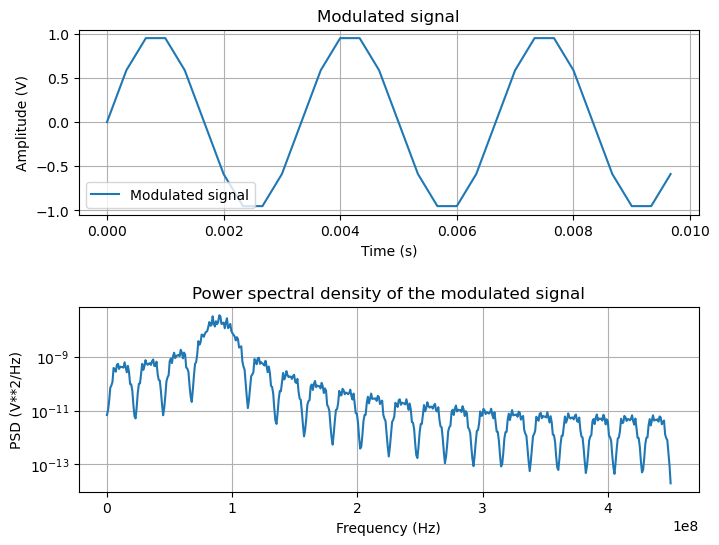

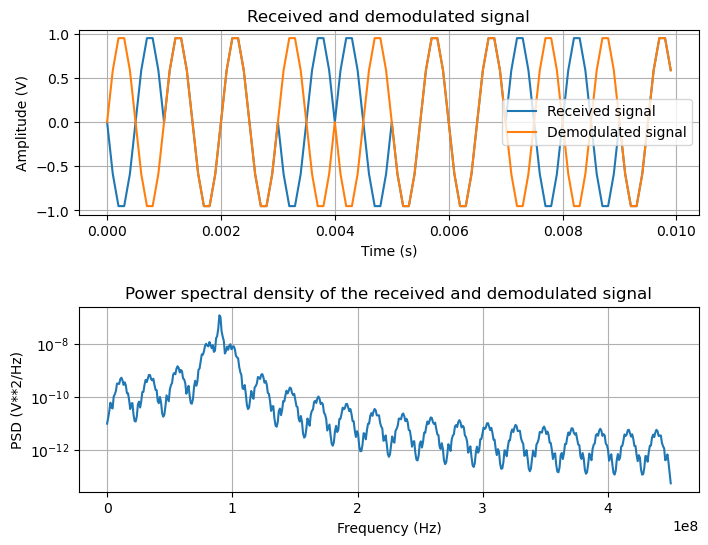

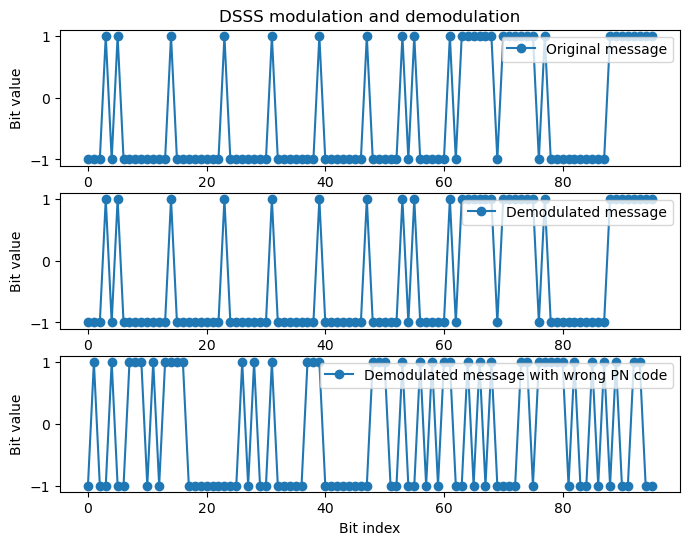

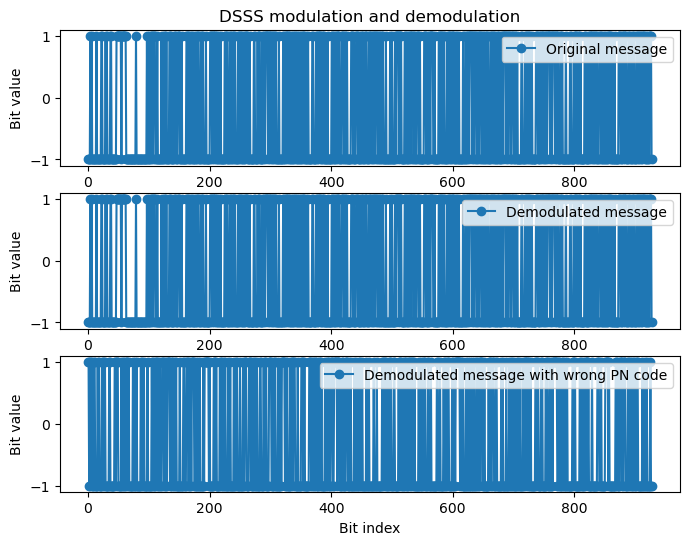

In [3]:
# generate a message with contents of uav_frame_info.py
frame1 = uavp.UAVPacket(20, 2, 1, 1, 1, 1, 5, 5, -5, -12, 0, -1)
m1 = frame1.get_message()

# generate a seccond message to be sent on the same channel with a
# different PN code
frame2 = uavp.TextPacket(10, 2, 3, 5, 6, 1, -2, -2, 0, 1, 0, 0, "In ECEN 526, we learn about Wi-Fi and its tricks,\
 Hoping to make connections as smooth as butter sticks.")
m2 = frame2.get_message()

# Transmission Characteristics
Fs = 900e6
fc = 100
pn_width = 4
windowperiod = .01

# PN code gen to multiply with message
pn_code1 = np.random.randint(0, 2, pn_width)
pn_code2 = np.random.randint(0, 2, pn_width)

# now create a UAVSignal object for each message
signal1 = uavs.UAVSignal(m1, pn_code1, Fs, fc, pn_width, windowperiod)
signal2 = uavs.UAVSignal(m2, pn_code2, Fs, fc, pn_width, windowperiod)

# get the modulated signal 
modulated_signal1 = signal1.modulate(plot=True)
modulated_signal2 = signal2.modulate(SNR=0, plot=True)
signal1.demodulate(plot = True)
signal1.demodulate_wrong()
signal1.plot_message()
signal2.plot_message()
frame1.print_tx_frame()
frame1.print_rx_frame(signal1.result)
frame2.print_tx_frame()


In [4]:

signal2.demodulate()
frame2.print_rx_frame(signal2.result)

UAV ID:  10
CONTROL ID:  2
UAV RECIEVER STATUS:  3
UAV TRANSMITTER STATUS:  5
CONTROL RECIEVER STATUS:  6
CONTROL TRANSMITTER STATUS:  1
CHANGE X:  -2
CHANGE Y:  -2
CHANGE Z:  0
CHANGE PITCH:  1
CHANGE ROLL:  0
CHANGE YAW:  0
TEXT:  In ECEN 526, we learn about Wi-Fi and its tricks, Hoping to make connections as smooth as butter sticks.
